# SECTION A [BATCH 1]
# WEEK 3

# Exercise 1

**Used Resources:**

**1.)https://medium.datadriveninvestor.com/implementation-of-data-preprocessing-on-titanic-dataset-6c553bef0bc6**

**2.)https://medium.com/all-about-machine-learning/understanding-data-preprocessing-taking-the-titanic-dataset-ebb78de162e0**

**3.)https://www.kaggle.com/code/uyeanil/titanic-custom-transformer-pipeline-pycaret**

**4.)https://www.kaggle.com/code/abhishekmamidi/titanic-data-preprocessing-and-visualization/notebook#-Titanic---Data-Preprocessing-and-Visualization-**

**5.)**

# Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [3]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking for null values:

df.isnull().sum()                       # df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Dropping irrelevant attributes:

cols = ['Name', 'PassengerId','Ticket', 'Cabin']
df = df.drop(cols, axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
# Interpolating Age values and replacing NAN with it(Instead of dropping NAN Age values):

df['Age'] = df['Age'].interpolate()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
#Creating Dummy Variables:

dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))
    titanic_dummies = pd.concat(dummies, axis=1)

In [15]:
#Combining the original dataset:

df = pd.concat((df,titanic_dummies), axis=1)

In [17]:
# we drop the redundant same columns from the data frame and now take a look at the new data set:

df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   1         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   female    891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  C         891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


# Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step

In [ ]:
df = df.drop('Survived', axis = 1, inplace = True)

In [18]:
Y = df.Survived

In [19]:
df_copy = df

In [20]:
df.drop('Survived', axis = 1, inplace = True)
X = df

In [28]:
# creating pipelines for categoric and numeric attrbutes

from sklearn.pipeline import Pipeline

# categoric attributes pipeline

categorical_pipeline = Pipeline(steps=[('onehot', OneHotEncoder(sparse = False, handle_unknown='ignore'))])

#numeric attributes pipeline

numerical_pipeline = Pipeline([("scaler", StandardScaler())])

In [29]:
# storing the names of all numeric attributes

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# storing the names of all categoric attributes

categorical_features = X.select_dtypes(include=['object']).columns

# declaring a preprocessor pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features ),
        ('categoric', OneHotEncoder(sparse = False, handle_unknown='ignore'), categorical_features)
    ])

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [31]:
# creating the pipeline for the model

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])

#fitting the model to the dataset

model_pipeline.fit(X_train, Y_train)
pred_y = model_pipeline.predict(X_test)
accuracy_score(Y_test, pred_y)

C:\Users\S.Krishnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.659217877094972

# Perform Bayes classification using cross validation

In [34]:
cv_score = cross_val_score(model_pipeline, X, Y, cv=5, scoring = 'accuracy')

C:\Users\S.Krishnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\S.Krishnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\S.Krishnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\S.Krishnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users

In [33]:
cv_score.mean()

0.6757265708367334

# Tabulate using relevant measures of accuracy , Sensitivity and specificity

In [35]:
test_pred = model_pipeline.predict(X_test)

In [36]:
model_acc = accuracy_score(Y_test, test_pred)

In [37]:
model_acc

0.659217877094972

In [38]:
conf_mat = confusion_matrix(Y_test, test_pred)

In [39]:
((tn, fp),(fn, tp)) = conf_mat

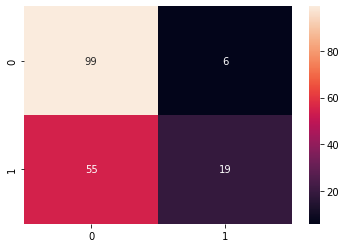

In [41]:
sb.heatmap( conf_mat, annot = True)
plt.show()

In [42]:
recall = tp/(tp+fn)
specificity = tn/(tn+fp)

In [43]:
print(f"Model Accuracy: {model_acc:.6f}\nRecall: {recall:.6f}\nSpecificity: {specificity:.6f}")

Model Accuracy: 0.659218
Recall: 0.256757
Specificity: 0.942857


# Visualize the ROC curve and comment on performance

In [44]:
test_pred_proba = model_pipeline.predict_proba(X_test)

In [45]:
roc = roc_curve(Y_test, test_pred_proba[:,0])

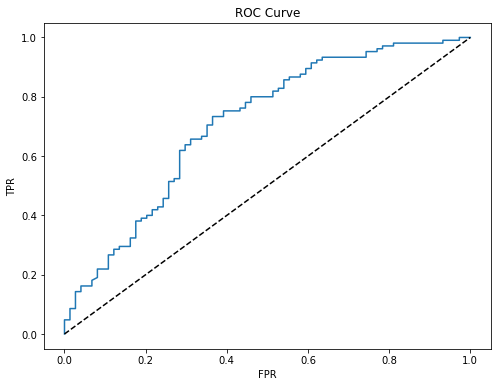

In [46]:
plt.figure(figsize = (8,6))
plt.plot(roc[1], roc[0])
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()